This Script will perform preproccessing on a dataset of images.

In [72]:
#import general packages
import numpy as np
import cv2
import skimage as sk
import matplotlib.pyplot as plt
import glob
import os
import random

Next step is to find the paths of all imgages of the dataset.

In [ ]:
# search for all images in the input directory
dir = r"C:\Users\marc\Documents\Biscuit Dataset - Team 4"
NOK_image_paths = glob.glob(os.path.join(dir, "NOK", '*.jpg'),recursive=True)
OK_image_paths = glob.glob(os.path.join(dir, "OK", '*.jpg'),recursive=True)

# size of the dataset
print("Number of NOK images: {}".format(len(NOK_image_paths)))
print("Number of OK images: {}".format(len(OK_image_paths)))

['C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0001.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0002.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0003.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0004.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0005.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0006.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0007.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0008.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0009.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0010.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0011.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0012.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0013.jpg', 'C:\\Users\\marc\\Documents\\Biscuit Dataset - Team 4\\NOK\\0014.jpg', 'C:\\

The next step is to look at the images to get a feeling for any patterns and preprocessing steps that might be required.

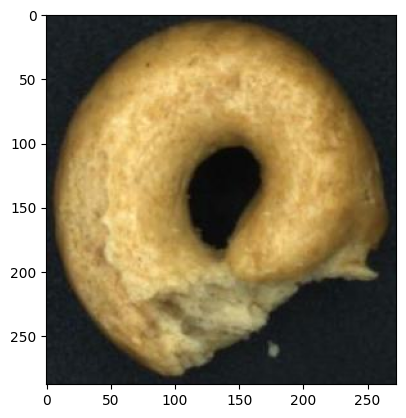

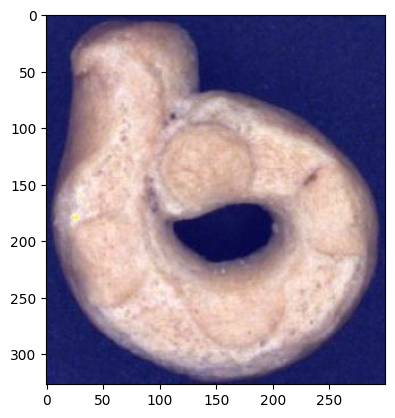

In [ ]:
# function to show an image
def show_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    
# show a random image from the NOK dataset
random_index = random.randint(0, len(NOK_image_paths))
image_path = NOK_image_paths[random_index]
show_image(image_path)

# show a random image from the OK dataset
random_index = random.randint(0, len(OK_image_paths))
image_path = OK_image_paths[random_index]
show_image(image_path)

The next step is to convert all images to grayscale.

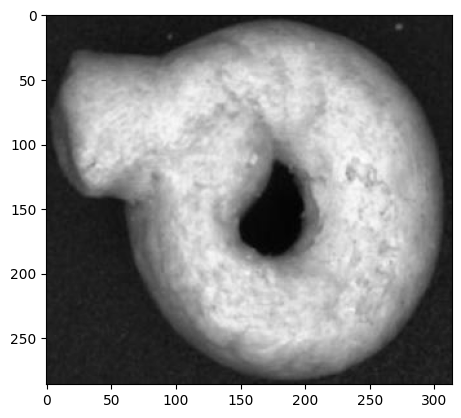

In [ ]:
# function to convert all images to grayscale
def to_grayscale(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

# put all images in one list
all_images = NOK_image_paths + OK_image_paths
all_images_grayscale = []

for image_path in all_images:
    grayscale_image_path = image_path.replace("Biscuit Dataset - Team 4", "Biscuit Dataset - Team 4 - Grayscale")
    if not os.path.exists(os.path.dirname(grayscale_image_path)):
        os.makedirs(os.path.dirname(grayscale_image_path))
    grayscale_image_path = grayscale_image_path.replace(".jpg", "_grayscale.jpg")
    image = to_grayscale(image_path)
    cv2.imwrite(grayscale_image_path, image)
    
    all_images_grayscale.append(grayscale_image_path)


plt.imshow(image,cmap='gray')
plt.title("Grayscale Image")
plt.show()
    

The next step is to threshold and filter the images.

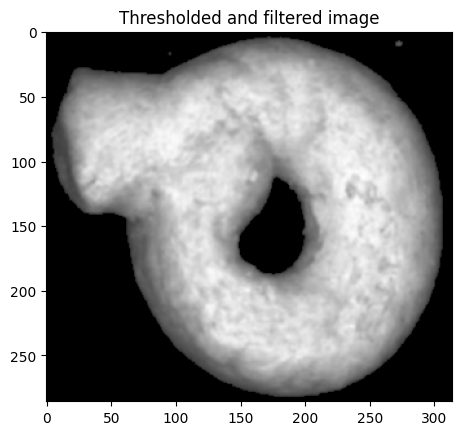

In [46]:
# function to perform thresholding and 2D-Filter on an image
def threshold_and_filter(image_path, threshold_value, kernel):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    thresholded = np.where(image < threshold_value, 0, image)
    # perform 2D-Filter
    gefiltertes_bild = cv2.filter2D(thresholded, -1, kernel)

    # set background to black
    background_black = np.where(thresholded == 0, 0, gefiltertes_bild)
    
    return background_black

# threshold_value for thresholding
threshold_value = 50
# Kernel for 2D-Filter
kernel = np.array([
    [1,  2,  1],
    [2,  4,  2],
    [1,  2,  1]
], dtype=np.float32)
kernel = kernel / np.sum(kernel)  #normalize kernel

# list for all thresholded images
all_images_grayscale_thresholded = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale:
    grayscale_threshold_image_path = image_path.replace("Biscuit Dataset - Team 4 - Grayscale", "Biscuit Dataset - Team 4 - Threshold")
    if not os.path.exists(os.path.dirname(grayscale_threshold_image_path)):
        os.makedirs(os.path.dirname(grayscale_threshold_image_path))
    grayscale_threshold_image_path = grayscale_threshold_image_path.replace(".jpg", "_threshold.jpg")
    image = threshold_and_filter(image_path,threshold_value=threshold_value,kernel=kernel)
    cv2.imwrite(grayscale_threshold_image_path, image)
    
    all_images_grayscale_thresholded.append(grayscale_threshold_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Thresholded and filtered image")
plt.show()

Next we want to detect the biscuit. For this we will use the contour method.

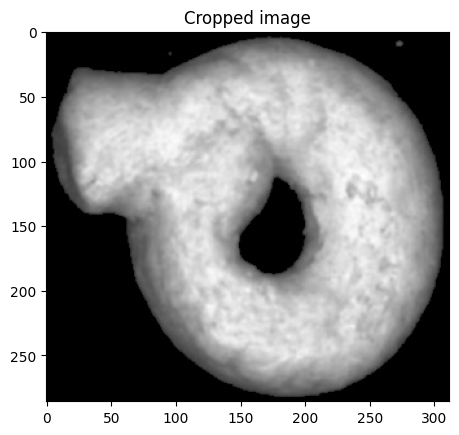

In [69]:
# perform contour detection on all images
def detect_roi(image_path):
    # read image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # take the largest contour
    cnt = max(contours, key=cv2.contourArea)

    # caluclate the bounding rectangle
    x, y, w, h = cv2.boundingRect(cnt)

    # crop the image 
    image = image[y:y+h, x:x+w]

    return image

# list for all cropped images
all_images_grayscale_thresholded_cropped = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale_thresholded:
    grayscale_threshold_cropped_image_path = image_path.replace("Biscuit Dataset - Team 4 - Threshold", "Biscuit Dataset - Team 4 - Cropped")
    if not os.path.exists(os.path.dirname(grayscale_threshold_cropped_image_path)):
        os.makedirs(os.path.dirname(grayscale_threshold_cropped_image_path))
    grayscale_threshold_cropped_image_path = grayscale_threshold_cropped_image_path.replace(".jpg", "_threshold.jpg")
    image = detect_roi(image_path)
    cv2.imwrite(grayscale_threshold_cropped_image_path, image)
    
    all_images_grayscale_thresholded_cropped.append(grayscale_threshold_cropped_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Cropped image")
plt.show()

Lastly Resize all images to a standard size.

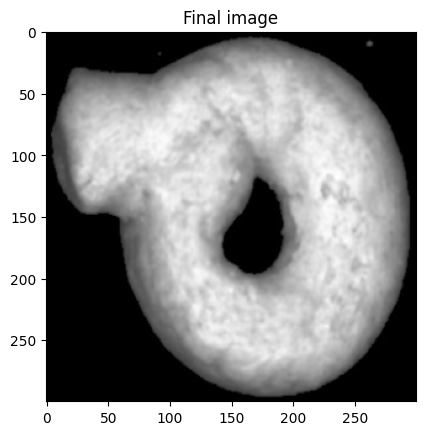

In [71]:
def resize_image(image_path, width, height):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (width, height))
    return image

# list for all cropped images
all_images_final_paths = []

# perform thresholding and 2D-Filter on all images
for image_path in all_images_grayscale_thresholded_cropped:
    final_image_path = image_path.replace("Biscuit Dataset - Team 4 - Cropped", "Biscuit Dataset - Team 4 - FINAL")
    if not os.path.exists(os.path.dirname(final_image_path)):
        os.makedirs(os.path.dirname(final_image_path))
    final_image_number = os.path.basename(final_image_path).split("_")[0]
    finally_image_path = final_image_path.replace(final_image_number, final_image_number + "_FINAL.jpg")
    image = resize_image(image_path, width=300, height=300)
    cv2.imwrite(final_image_path, image)
    
    all_images_final_paths.append(final_image_path)
    
plt.imshow(image,cmap='gray')
plt.title("Final image")
plt.show()